### Task Do feature selection as per metods taught is session 54 on SECOM dataset

In [100]:
%matplotlib inline

In [17]:
import pandas as pd

data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQtBXo5cBnDsM2fmfHPm6u72KGUS5FjPHNGMxOfYjA9-CAhmnRpwkIw_rOR3sANJIToiUU__6fbBvig/pub?gid=572763137&single=true&output=csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [18]:
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [19]:
data["Pass/Fail"].value_counts()

Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64

In [114]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [ ]:
# Preprocessing 
# Dropping Time column
data = data.drop('Time', axis=1)

data.isna().sum() # columns contain NaN values

2743.24

3356.35

In [32]:
data["0"].isna().sum()

6

In [33]:
np.random.uniform(data["0"].min(), data["0"].max(), size=data["0"].isnull().sum())

array([2973.60121894, 3293.88345808, 2917.57946027, 3209.08900249,
       2844.11105633, 2811.36214128])

In [ ]:
# Generate random numbers within the range
random_values = np.random.uniform(min_value, max_value, size=data[column].isnull().sum())

In [29]:
data["0"][data["0"].isna()].index

Index([21, 66, 117, 538, 725, 885], dtype='int64')

In [35]:
# fill NaN values with random values in uniform distribution of min and max value
for column in data.columns:

    # find min and max of particular column
    min_value = data[column].min()
    max_value = data[column].max()

    # Generate random numbers within the range
    random_values = np.random.uniform(min_value,max_value,size=data[column].isna().sum())

    # Create a Series with the random values (why we create series here because fillna() match index values to fill the data)
    random_series = pd.Series(random_values,index = data[column][data[column].isna()].index)

    # Fill NaN values with the random series
    data[column] = data[column].fillna(random_series)

In [44]:
# Logistic Model Before Feature Selection

# Separate features and target
X = data.drop(columns="Pass/Fail")
y = data["Pass/Fail"]

# Split data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

print(X_train.shape)
print(X_test.shape)

# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train,y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

(1253, 590)
(314, 590)
Test accuracy: 0.8980891719745223


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


To perform filter-based feature selection on the "UCI SECOM" dataset, which has 592 columns and a target column called "Pass/Fail," we can utilize the following methods:

1. Duplicate Features:
   - Identify and remove duplicate columns from the dataset. Columns with identical values provide redundant information and do not contribute to the prediction task.

2. Variance Threshold Method:
   - Calculate the variance of each feature.
   - Remove features with low variance, as they tend to have little or no predictive power.
   - Set a threshold value for variance and remove features below that threshold.

3. Correlation:
   - Compute the correlation matrix of the features.
   - Identify highly correlated features and choose one from each highly correlated group.
   - High correlation between features indicates redundancy, and removing one from each correlated group helps reduce multicollinearity.

4. ANOVA (Analysis of Variance):
   - Perform an ANOVA test between each feature and the target variable ("Pass/Fail").
   - Select features with a significant impact on the target variable.
   - Set a significance level (e.g., p-value threshold) for the test to determine the importance of each feature.

5. Chi-Squared:
   - Apply the Chi-Squared test between each feature and the target variable, considering both features as categorical.
   - Select features with a significant association with the target variable.
   - Set a significance level (e.g., p-value threshold) to determine the importance of each feature.

Implementing these feature selection methods in Python using the "UCI SECOM" dataset can be done as follows:

In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_selection import chi2,VarianceThreshold,f_classif,SelectKBest
from scipy.stats import pearsonr

In [23]:
data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQtBXo5cBnDsM2fmfHPm6u72KGUS5FjPHNGMxOfYjA9-CAhmnRpwkIw_rOR3sANJIToiUU__6fbBvig/pub?gid=572763137&single=true&output=csv"

# Load the dataset

Data = pd.read_csv(data_path) 
Data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [24]:
# Remove duplicate features
# Get the subset of columns with duplicate values
duplicate_cols = Data.columns[Data.T.duplicated()]

# Remove the duplicated columns
data = Data.drop(columns=duplicate_cols)

# Drop time column
data.drop('Time', inplace=True, axis=1)

In [25]:
# Numbers Of Columns after removing Duplicate columns
print("Number of Columns - ", Data.shape[1])
print("Number of Columns after removing duplicate columns- ", data.shape[1])

Number of Columns -  592
Number of Columns after removing duplicate columns-  487


In [6]:
def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [12]:
duplicate_dict = get_duplicate_columns(data)
list1 = []
for i in duplicate_dict:
    list1.extend(duplicate_dict[i])
print(len(list1))

104


##### Variance Threshold method

In [26]:
sel = VarianceThreshold(threshold=0.01)
sel.fit(data)

VarianceThreshold(threshold=0.01)

In [35]:
columns = data.columns[sel.get_support()]

data_vt = sel.transform(data)

data_vt = pd.DataFrame(data_vt, columns=columns)

# Numbers Of Columns after Variance Threshold Method

print("Number of Columns after Variance Threshold Method- ", data_vt.shape[1])

Number of Columns after Variance Threshold Method-  315


In [36]:
data_vt.head()

,0,1,2,3,4,6,12,14,15,16,...,571,572,573,574,576,577,581,585,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,202.4396,7.9558,414.8710,10.0433,...,2.1113,8.95,0.3157,3.0624,1.6765,14.9509,NaN,2.3630,NaN,-1.0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,200.5470,10.1548,414.7347,9.2599,...,2.4335,5.92,0.2653,2.0111,1.1065,10.9003,208.2045,4.4447,208.2045,-1.0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,202.0179,9.5157,416.7075,9.3144,...,2.0293,11.21,0.1882,4.0923,2.0952,9.2721,82.8602,3.1745,82.8602,1.0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,201.8482,9.6052,422.2894,9.6924,...,2.0253,9.33,0.1738,2.8971,1.7585,8.5831,73.8432,2.0544,73.8432,-1.0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,201.9424,10.5661,420.5925,10.3387,...,2.0275,8.83,0.2224,3.1776,1.6597,10.9698,NaN,99.3032,73.8432,-1.0


##### Correlation method

In [37]:
data_vt.corr()

,0,1,2,3,4,6,12,14,15,16,...,571,572,573,574,576,577,581,585,589,Pass/Fail
0,1.000000,-0.145071,0.004775,-0.007655,-0.011047,0.002281,0.010386,-0.007089,0.030712,-0.005753,...,-0.023184,0.013679,-0.002068,0.015208,0.013230,0.008603,-0.028380,0.023605,0.004177,-0.025144
1,-0.145071,1.000000,0.005802,-0.007603,-0.001641,-0.025702,0.034120,-0.037842,-0.087535,-0.001882,...,-0.037974,0.001753,-0.011474,0.001303,0.002570,-0.010149,0.083463,0.002273,0.044834,-0.002615
2,0.004775,0.005802,1.000000,0.298935,0.095891,-0.136225,0.018356,0.006507,0.006126,-0.000788,...,-0.015716,-0.000518,-0.030692,0.001342,0.002593,-0.028713,-0.010759,0.015765,-0.033226,-0.000957
3,-0.007655,-0.007603,0.298935,1.000000,-0.058483,-0.685835,-0.028384,-0.020006,-0.013236,-0.004614,...,-0.017952,0.007636,0.013171,0.006824,0.008218,0.016443,-0.096619,0.026043,-0.081157,-0.024631
4,-0.011047,-0.001641,0.095891,-0.058483,1.000000,-0.074368,-0.002711,-0.017607,0.011456,-0.001763,...,-0.082592,-0.012027,-0.016543,-0.012267,-0.012166,-0.004072,0.088327,-0.001617,0.051428,-0.013760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,0.008603,-0.010149,-0.028713,0.016443,-0.004072,-0.012346,0.031436,0.009506,-0.019154,-0.004397,...,-0.121115,0.863768,0.957874,0.851784,0.859278,1.000000,-0.016806,-0.023925,-0.024766,-0.049633
581,-0.028380,0.083463,-0.010759,-0.096619,0.088327,0.060171,-0.074923,0.069303,0.045791,-0.010696,...,-0.001881,-0.020636,-0.018903,-0.019587,-0.020556,-0.016806,1.000000,-0.000673,1.000000,-0.020748
585,0.023605,0.002273,0.015765,0.026043,-0.001617,-0.039569,0.000523,0.002536,0.017750,0.002643,...,0.006720,-0.017180,-0.022690,-0.016813,-0.017148,-0.023925,-0.000673,1.000000,-0.003801,0.005034
589,0.004177,0.044834,-0.033226,-0.081157,0.051428,0.044227,-0.036733,0.068182,0.009767,-0.013922,...,0.010952,-0.022672,-0.027153,-0.020471,-0.022568,-0.024766,1.000000,-0.003801,1.000000,-0.002654


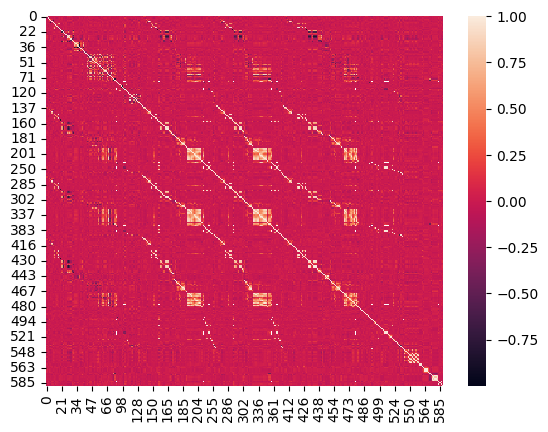

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data_vt.corr())
plt.show()

In [88]:
# Correlation
corr_matrix = data_vt.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
data_corr = data_vt.drop(to_drop, axis=1)

# Numbers Of Columns after Variance Threshold Method

print("Number of Columns after Correlation- ", data_corr.shape[1])

Number of Columns after Correlation-  162


In [90]:
data_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 162 entries, 0 to Pass/Fail
dtypes: float64(162)
memory usage: 1.9 MB


In [89]:
corr_matrix = data_vt.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
column_to_drop = []
for column in upper_tri.columns:
    if any(upper_tri[column] > 0.8) :
        column_to_drop.append(column)
len(column_to_drop)

153

In [111]:
from scipy.stats import f_oneway

# Significance Value
alpha = 0.05 

# Columns haveing p_value less than alpha
column_pvalues = []

# Iterate over each column
for column in data_corr.iloc[:, :-1].columns:
    # Extract the non-missing values in the column
    column_data = data_corr[column].dropna()
    
    # Perform ANOVA with the target variable
    anova_result = f_oneway(column_data, data_corr['Pass/Fail'])
    
    # Print the ANOVA result or perform further analysis
    print(f"Column: {column} - ANOVA p-value: {anova_result.pvalue}")

    if anova_result.pvalue <= alpha:
        column_pvalues.append((column, anova_result.pvalue))

# Selecting best 100 Features - lower p-value better feature
# Sort the column p-values in ascending order
column_pvalues.sort(key=lambda x: x[1])

# Select the top 100 columns with the lowest p-values
selected_columns = [column for column, _ in column_pvalues[:100]]

data_anova = data_corr[selected_columns+['Pass/Fail']]

print("Number of Columns after Correlation- ", data_anova.shape[1])

Column: 0 - ANOVA p-value: 0.0
Column: 1 - ANOVA p-value: 0.0
Column: 2 - ANOVA p-value: 0.0
Column: 3 - ANOVA p-value: 0.0
Column: 4 - ANOVA p-value: 0.0003805229753154665
Column: 6 - ANOVA p-value: 0.0
Column: 12 - ANOVA p-value: 0.0
Column: 14 - ANOVA p-value: 0.0
Column: 15 - ANOVA p-value: 0.0
Column: 16 - ANOVA p-value: 0.0
Column: 18 - ANOVA p-value: 0.0
Column: 19 - ANOVA p-value: 0.0
Column: 21 - ANOVA p-value: 0.0
Column: 22 - ANOVA p-value: 0.0
Column: 23 - ANOVA p-value: 0.0
Column: 24 - ANOVA p-value: 5.0211194207923185e-05
Column: 25 - ANOVA p-value: 0.0
Column: 28 - ANOVA p-value: 0.0
Column: 29 - ANOVA p-value: 0.0
Column: 31 - ANOVA p-value: 0.0
Column: 32 - ANOVA p-value: 0.0
Column: 33 - ANOVA p-value: 0.0
Column: 34 - ANOVA p-value: 0.0
Column: 35 - ANOVA p-value: 0.0
Column: 37 - ANOVA p-value: 0.0
Column: 38 - ANOVA p-value: 0.0
Column: 39 - ANOVA p-value: 0.0
Column: 40 - ANOVA p-value: 0.0
Column: 41 - ANOVA p-value: 0.0
Column: 43 - ANOVA p-value: 0.0
Column: 4

In [112]:
# Chi-Squared
# -> Our Data is Numerical so chi-squared can't be done.

In [116]:
# Shape of Data after Feature Selection

print("Shape - ", data_anova.shape)

# Filling NaN Values with random 
for column in data_anova.columns:
    # print("Column- ", column)
    # Get the minimum and maximum values of the column
    min_value = data_anova[column].min()
    max_value = data_anova[column].max()

    # Generate random numbers within the range
    random_values = np.random.uniform(min_value, max_value, size=data_anova[column].isnull().sum())
    
    # Create a Series with the random values
    random_series = pd.Series(random_values, index=data_anova[column][data_anova[column].isnull()].index)

    # Fill NaN values with the random series
    data_anova[column] = data_anova[column].fillna(random_series)

    # Print
    # print(data[column].isnull().sum())


# Separate features and target
X = data_anova.drop('Pass/Fail', axis=1)
y = data_anova['Pass/Fail']



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)


# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=10000)  # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Shape -  (1567, 101)
(1253, 100)
(314, 100)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15816\3725693012.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_anova[column] = data_anova[column].fillna(random_series)


Test accuracy: 0.910828025477707


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
